# 04b differentially expressed genes - pIC

Goal:

Generate lists with overlapping genes for MPPs and HSCs and to assess specificity. Three levels of stringency 1.5 fold, 1.2 fold and all differentially expressed genes by MAST. 


done with this docker image:

docker run \
--rm \
-d \
--name scanpy2 \
-p 8880:8888 \
-e JUPYTER_ENABLE_LAB=YES \
-v /Users/efast/Documents/:/home/jovyan/work \
scanpy:1.4.6


['MPP_Primed', 'MPP_Metabolism', 'MPP_Stem cell', 'MPP_Cell-cycle', 'MPP_Acute-Activation', 
 'MPP_Interferon', 'MPP_Interferon cell-cycle','MPP_Myeloid', 'MPP_all']

['HSC_Metabolism', 'HSC_Quiescent', 'HSC_Activated', 'HSC_Interferon', 
           'HSC_Acute-Activation', 'HSC_Cell-cycle', 'HSC_all']

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler
import scipy.stats as stats
from helper_functions import *

from upsetplot import UpSet
import re

## Read data

In [2]:
treatment = 'pIC'

In [3]:
#Read data and make overlap files + save

files = ['1.2', '1.5', 'nocutoff']

for file in files:
    path_name_in = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'
    path_name_out = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
    results_df = pd.read_csv(path_name_in)
    results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
    results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
    results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']
    df_compiled = results_df[['primerid','HSC_any','MPP_any','overlap']]
    df_compiled = df_compiled.set_index('primerid')
    df_compiled = df_compiled.dropna(how='all')
    df_compiled = df_compiled.fillna(0)
    df_compiled['specific'] = df_compiled.apply (lambda row: make_overlap_column(row), axis=1)
    df_compiled.to_csv(path_name_out, index=True, header=True)

### plot specific HSCs overlap

In [17]:
samples = ['HSC_Metabo', 'HSC_Quiesc', 'HSC_Activated', 'HSC_Cell-cycle', 'HSC_Interferon', 'HSC_all']


#### 1.5 fold

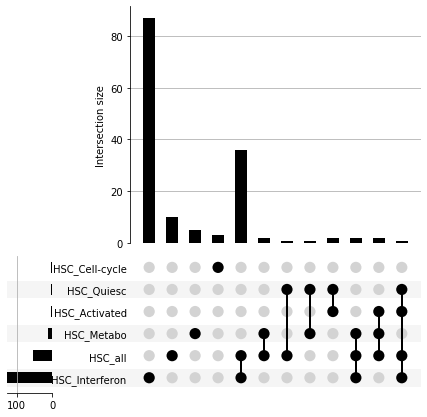

In [18]:
file = '1.5'
path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'HSC_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.5_HSC_pIC.pdf')

#### 1.2 fold

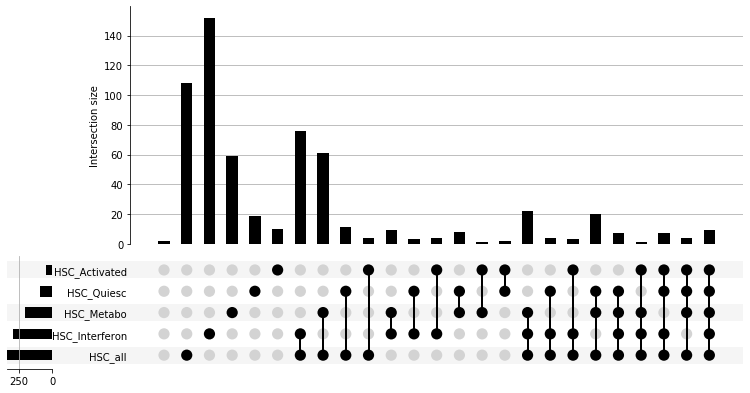

In [6]:
file = '1.2'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'HSC_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.2_HSC_pIC.pdf')

#### all

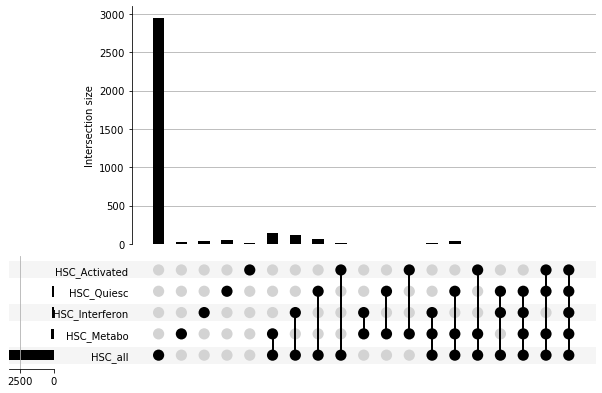

In [7]:
file = 'nocutoff'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'HSC_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_all_HSC_pIC.pdf')

### plot specific MPPs overlap

In [8]:
samples = ['MPP_Primed', 'MPP_Metabo', 'MPP_Stem cell', 'MPP_Cell-cycle', 'MPP_all']

#### 1.5 fold

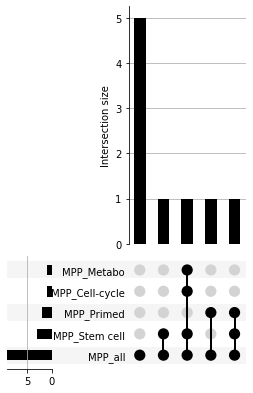

In [9]:
file = '1.5'
path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.5_MPP_pIC.pdf')

#### 1.2 fold

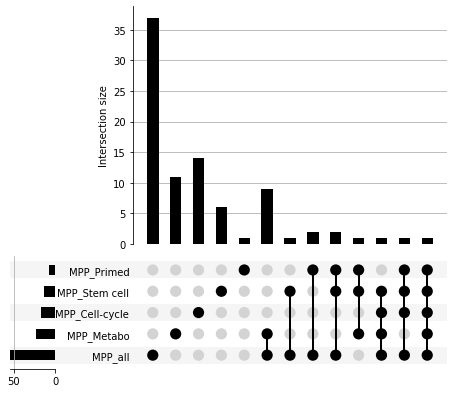

In [10]:
file = '1.2'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.2_MPP_pIC.pdf')

#### all

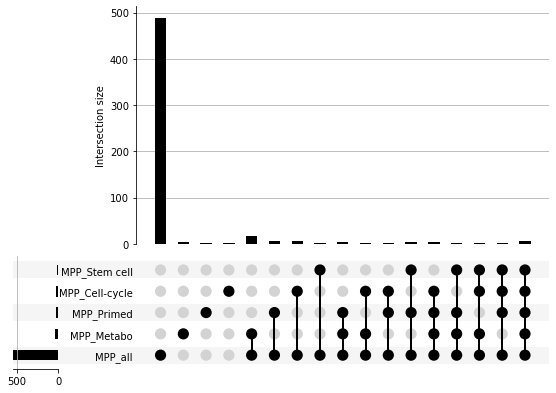

In [11]:
file = 'nocutoff'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_all_MPP_pIC.pdf')

### plot specific MPPs overlap looking at surface markers

In [12]:
samples = ['MPP', 'MPP1', 'MPP2', 'MPP3/4']


#### 1.5 fold

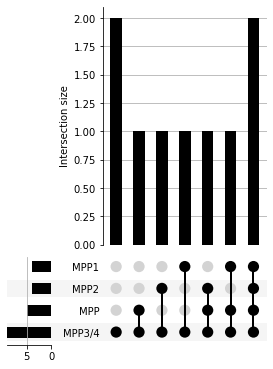

In [13]:
file = '1.5'
path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.5_MPP_surf_pIC.pdf')

#### 1.2 fold

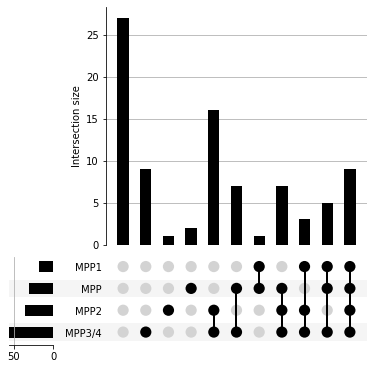

In [14]:
file = '1.2'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.2_MPP_surf_pIC.pdf')

#### all

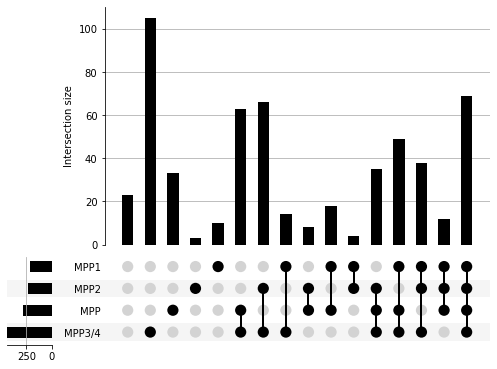

In [15]:
file = 'nocutoff'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_all_MPP_surf_pIC.pdf')

In [16]:
!pip list

Package                Version            
---------------------- -------------------
alembic                1.3.0              
anndata                0.7.1              
async-generator        1.10               
attrs                  19.3.0             
backcall               0.1.0              
beautifulsoup4         4.8.1              
bleach                 3.1.0              
blinker                1.4                
bokeh                  1.3.4              
cellbrowser            0.7.7              
certifi                2020.4.5.1         
certipy                0.1.3              
cffi                   1.13.2             
chardet                3.0.4              
Click                  7.0                
cloudpickle            1.2.2              
conda                  4.7.12             
conda-package-handling 1.6.0              
cryptography           2.8                
cycler                 0.10.0             
Cython                 0.29.14            
cytoolz    